[View in Colaboratory](https://colab.research.google.com/github/frankguo77/Kaggle/blob/master/Titanic.ipynb)

In [142]:
!pip install kaggle

In [143]:
!kaggle competitions download -c titanic --force

^C
User cancelled operation


In [0]:
f = open('/content/.kaggle/kaggle.json','w')
f.write('{"username":"frankguo824","key":"c7975dcb1ac7e24d0a762e6b62164de1"}')
f.close()

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c titanic --force

In [147]:
!ls .kaggle/competitions/titanic

gender_submission.csv  test.csv  train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train_df = pd.read_csv("./.kaggle/competitions/titanic/train.csv")
test_df = pd.read_csv("./.kaggle/competitions/titanic/test.csv")
train_df.head()

In [0]:
test_df.head()

In [0]:
train_df["Sex"] == 'female'

Percentage of females who survived:74.20
Percentage of males who survived:18.89


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


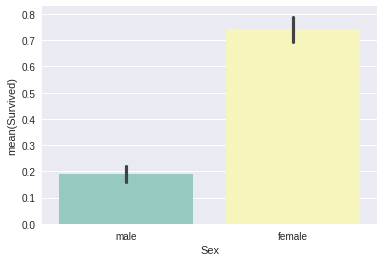

In [0]:
sns.barplot(x="Sex", y="Survived", data=train_df, palette='Set3')
print("Percentage of females who survived:%.2f" % (train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize = True)[1]*100))
print("Percentage of males who survived:%.2f" % (train_df["Survived"][train_df["Sex"] == 'male'].value_counts(normalize = True)[1]*100))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Percentage of Pclass = 1 who survived:62.96
Percentage of Pclass = 2 who survived:47.28
Percentage of Pclass = 3 who survived:24.24


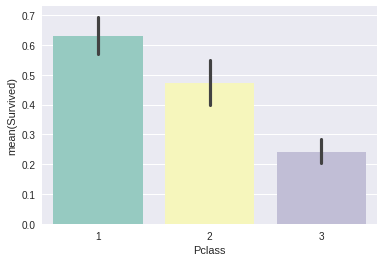

In [0]:
sns.barplot(x="Pclass", y="Survived", data=train_df, palette='Set3')
print("Percentage of Pclass = 1 who survived:%.2f" % (train_df["Survived"][train_df["Pclass"] == 1].value_counts(normalize = True)[1]*100))
print("Percentage of Pclass = 2 who survived:%.2f" % (train_df["Survived"][train_df["Pclass"] == 2].value_counts(normalize = True)[1]*100))
print("Percentage of Pclass = 3 who survived:%.2f" % (train_df["Survived"][train_df["Pclass"] == 3].value_counts(normalize = True)[1]*100))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


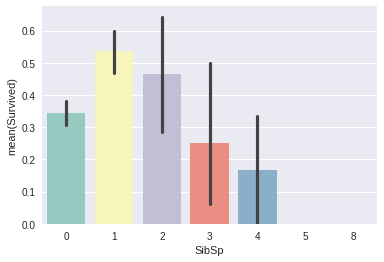

In [0]:
sns.barplot(x="SibSp", y="Survived", data=train_df, palette='Set3')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


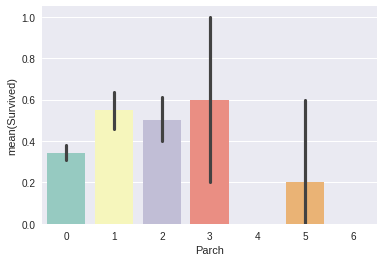

In [0]:
sns.barplot(x="Parch", y="Survived", data=train_df, palette='Set3')

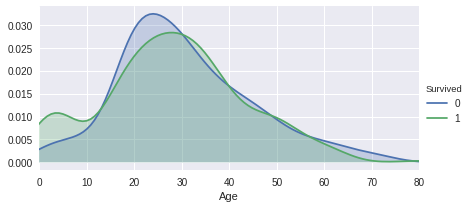

In [0]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
#facet.map(sns.distplot,'Age')
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

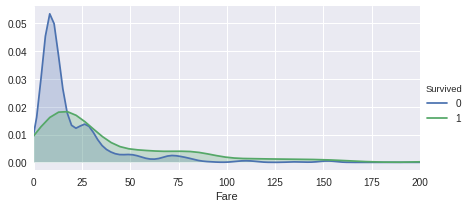

In [0]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 200))
facet.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


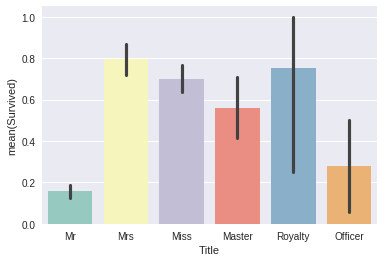

In [0]:
all_data = pd.concat([train_df, test_df], ignore_index = True)

all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data, palette='Set3')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


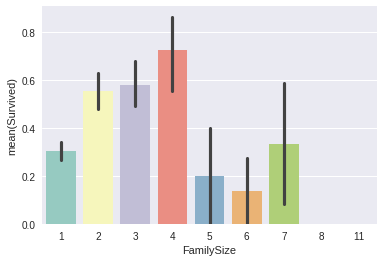

In [0]:
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=all_data, palette='Set3')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


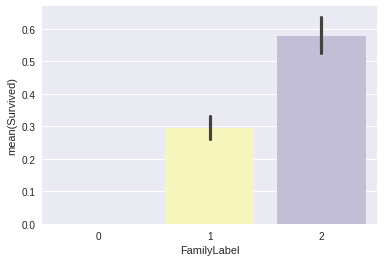

In [0]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
all_data['FamilyLabel']=all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data, palette='Set3')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


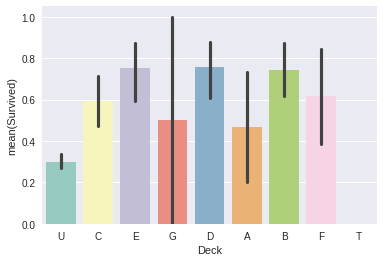

In [0]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data, palette='Set3')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


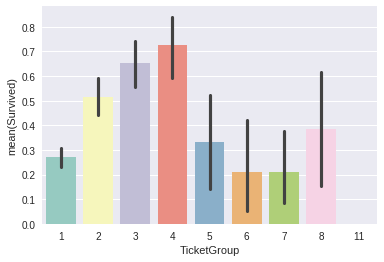

In [0]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3')

In [0]:
all_data['Ticket'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


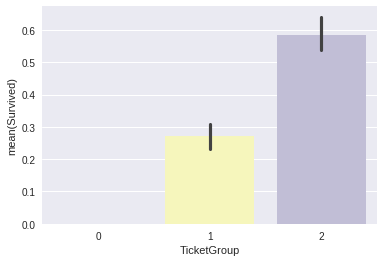

In [0]:
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3')

In [0]:
from sklearn.ensemble import RandomForestRegressor

age_df = all_data[['Age', 'Pclass','Sex','Title']]
age_df.shape
age_df = pd.get_dummies(age_df)
age_df.shape
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 

In [0]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


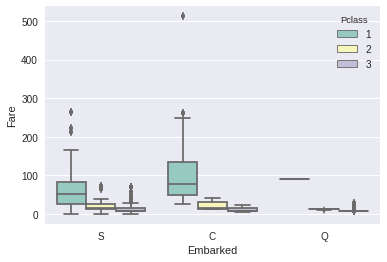

In [0]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=all_data, palette="Set3")

In [0]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

In [0]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,U,1


In [0]:
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)

In [0]:
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]

In [0]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


In [0]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


In [0]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Cacic', 'Zabour', 'Turpin', 'Lefebre', 'Arnold-Franchi', 'Panula', 'Rosblom', 'Boulos', 'Olsson', 'Vander Planke', 'Lahtinen', 'Barbara', 'Oreskovic', 'Bourke', 'Attalah', 'Skoog', 'Lobb', 'Van Impe', 'Danbom', 'Johnston', 'Canavan', 'Rice', 'Ilmakangas', 'Ford', 'Strom', 'Sage', 'Palsson', 'Goodwin', 'Caram', 'Jussila', 'Robins'}
{'Beckwith', 'Greenfield', 'Jussila', 'Daly', 'Jonsson', 'Nakid', 'Bradley', 'Taylor', 'Dick', 'Frauenthal', 'Beane', 'Kimball', 'Cardeza', 'Harder', 'McCoy', 'Goldenberg', 'Bishop', 'Chambers', 'Duff Gordon', 'Frolicher-Stehli'}


In [0]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
all_data=pd.concat([train, test])
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data=pd.get_dummies(all_data)
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.as_matrix()[:,1:]
y = train.as_matrix()[:,0]

In [0]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(X,y)
print(gsearch.best_params_, gsearch.best_score_)

In [0]:
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 42,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x7f89a3744a60>)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0....estimators=42, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=True))])

In [0]:
from sklearn import cross_validation, metrics
cv_score = cross_validation.cross_val_score(pipeline, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [23] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


CV Score : Mean - 0.8406078 | Std - 0.038599 


In [0]:
predictions = pipeline.predict(test)
PassengerId=test['PassengerId'] = test_df['PassengerId']
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission.csv", index=False)

In [0]:
!ls

datalab  submission.csv


In [0]:
!kaggle competitions submit -c titanic -f submission.csv -m "result of randomforest"

Successfully submitted to Titanic: Machine Learning from Disaster

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=10, scoring="roc_auc", n_jobs= 4, verbose = 1)

gsGBC.fit(X,y)

print(gsGBC.best_params_, gsGBC.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   29.7s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   57.2s finished


{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300} 0.8853128629156884


In [124]:
GBC = GradientBoostingClassifier(max_depth = 8, max_features = 0.3, min_samples_leaf = 100, n_estimators = 300,learning_rate = 0.1)
GBC.fit(X,y)
cv_score = cross_validation.cross_val_score(GBC, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

CV Score : Mean - 0.8418068 | Std - 0.03682675 


In [139]:
!ls


datalab  GBoost_submission.csv	submission.csv


In [0]:
test['PassengerId']

In [0]:
predictions = GBC.predict(test)
PassengerId=test['PassengerId'] = test_df['PassengerId']
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("GBoost_submission.csv", index=False)

In [148]:
!kaggle competitions submit -c titanic -f GBoost_submission.csv -m "result of gradientboosting"

Successfully submitted to Titanic: Machine Learning from Disaster

In [122]:
'''
base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1
'''       


import xgboost as xgb
xgb_model = xgb.XGBClassifier()
param_grid = {
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [2,4, 8],
              }
gsxgb = GridSearchCV(xgb_model,param_grid = param_grid, cv=10, scoring="roc_auc", n_jobs= 4, verbose = 1)
gsxgb.fit(X,y)

print(gsxgb.best_params_, gsxgb.best_score_)


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Done 106 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 256 tasks      | elapsed:   30.8s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:   34.7s finished


{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300} 0.8797313440675164


In [125]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.1,max_depth = 2, n_estimators=300)
xgb_model.fit(X,y)
cv_score = cross_validation.cross_val_score(GBC, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

CV Score : Mean - 0.8395596 | Std - 0.04062207 


In [0]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

In [0]:
missingdata(train_df)

In [0]:
missingdata(test_df)

In [0]:
from collections import Counter

def detect_outliers(df,n,features):
  outlier_indices = []
  for col in features:
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    
    outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
    outlier_indices.extend(outlier_list_col)
 
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers  

Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
    